# **Install the library**

In [ ]:
pip install yfinance

In [ ]:
pip install tensorflow

# **Data Preprocessing:**

### **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.optimize as sco

### **Define the start and end dates for data retrieval**

In [ ]:
start_date = '2022-01-01'
end_date = '2023-03-31'

### **Define a list of stock symbols**

In [ ]:
symbols = ['RELIANCE.NS','HDFCBANK.NS','ICICIBANK.NS','HDFC.NS','INFY.NS','ITC.NS','TCS.NS','KOTAKBANK.NS','LT.NS','AXISBANK.NS','ADANIPORTS.NS','ASIANPAINT.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BHARTIARTL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DIVISLAB.NS','DRREDDY.NS','EICHERMOT.NS','GRASIM.NS','HCLTECH.NS','HEROMOTOCO.NS','HINDALCO.NS','HINDUNILVR.NS','IOC.NS','INDUSINDBK.NS','JSWSTEEL.NS','M&M.NS','MARUTI.NS','NTPC.NS','NESTLEIND.NS','ONGC.NS','POWERGRID.NS','SHREECEM.NS','SBIN.NS','SUNPHARMA.NS','TATAMOTORS.NS','TATASTEEL.NS','TECHM.NS','TITAN.NS','ULTRACEMCO.NS','UPL.NS','WIPRO.NS','ADANIGREEN.NS','ADANIENT.NS','HINDPETRO.NS','BPCL.NS']

### **Download stock data using Yahoo Finance API**

In [ ]:
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  50 of 50 completed


In [ ]:
data

Adj Close                                                        \
            ADANIENT.NS ADANIGREEN.NS ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                                            
2022-01-03  1714.705078   1346.900024    731.532227   3375.409180  693.864136   
2022-01-04  1716.552490   1366.699951    734.164001   3411.802734  706.618530   
2022-01-05  1713.007446   1399.650024    749.706360   3478.375977  724.305115   
2022-01-06  1710.660889   1409.800049    734.710205   3466.392334  727.692932   
2022-01-07  1696.680786   1423.099976    731.035645   3527.196045  727.991821   
...                 ...           ...           ...           ...         ...   
2023-03-23  1792.207153    982.349976    654.950012   2779.291748  847.057373   
2023-03-24  1738.910522   1029.349976    638.000000   2779.987061  838.175659   
2023-03-27  1721.328125    984.900024    629.099976   2785.202393  831.639038   
2023-03-28  1599.250244    935.650024    593.400024   2766.030029  830.740967   
2023-03-29  1738.660767    894.349976    636.650024   2752.172363  840.870117   

                                                                    \
           BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS   
Date                                                                 
2022-01-03   2969.873047   1695.735596   7132.050781    688.240906   
2022-01-04   2980.792969   1711.128906   7253.954102    694.363708   
2022-01-05   3043.687012   1796.303589   7577.779297    696.902405   
2022-01-06   3097.744629   1796.113892   7654.290039    707.256409   
2022-01-07   3074.454346   1773.186279   7566.468262    701.581665   
...                  ...           ...           ...           ...   
2023-03-23   3632.283203   1288.645142   5783.295898    763.549988   
2023-03-24   3599.326172   1239.346924   5601.063965    762.450012   
2023-03-27   3580.191406   1237.798584   5545.343262    761.750000   
2023-03-28   3565.193848   1221.865356   5487.243652    748.450012   
2023-03-29   3647.656982   1244.741333   5577.219238    743.599976   

                        ...      Volume                             \
               BPCL.NS  ... SHREECEM.NS SUNPHARMA.NS TATAMOTORS.NS   
Date                    ...                                          
2022-01-03  374.373993  ...       19537      3726756      32748423   
2022-01-04  374.228516  ...       26215      3027262      24100985   
2022-01-05  382.712769  ...       17262      2436343      15420105   
2022-01-06  383.779358  ...       25411      2423850      16563230   
2022-01-07  384.167236  ...       32658      1475374      15532165   
...                ...  ...         ...          ...           ...   
2023-03-23  348.350006  ...       27917      1857923       9817460   
2023-03-24  345.399994  ...       35202      1534322       6877960   
2023-03-27  344.850006  ...       37651      2473222       7433933   
2023-03-28  339.850006  ...       23209      1394675       9553659   
2023-03-29  339.850006  ...       41315      3045795      10478506   

                                                                           \
           TATASTEEL.NS   TCS.NS TECHM.NS TITAN.NS ULTRACEMCO.NS   UPL.NS   
Date                                                                        
2022-01-03     38658030  2346158  1779147   921729        250533  1157591   
2022-01-04     59757310  2488606  2701533  1037293        315188  1247395   
2022-01-05     61861760  1733031  3138050  1244568        400874  1156604   
2022-01-06     53354000  1810293  4290750  1130508        403448  5436867   
2022-01-07     39738570  2460591  2103362  4625230        543512  2052552   
...                 ...      ...      ...      ...           ...      ...   
2023-03-23     20913844  1372218  1720354   610778        232908   914840   
2023-03-24     39014278  1329577  1943460   838919        228994   982591   
2023-03-27     24753289  1524217  1455300   728727        251626  1355

### **Retrieve the 'Adj Close' prices from the downloaded data**

In [ ]:
data['Adj Close']

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1714.705078,1346.900024,731.532227,3375.409180,693.864136,2969.873047,1695.735596,7132.050781,688.240906,374.373993,...,27029.671875,833.290466,497.600006,49.178509,3663.824219,1729.135742,2498.302002,7679.813965,753.678894,709.859192
2022-01-04,1716.552490,1366.699951,734.164001,3411.802734,706.618530,2980.792969,1711.128906,7253.954102,694.363708,374.228516,...,26738.712891,822.248108,489.600006,49.451859,3728.123047,1733.979858,2556.853027,7606.684082,751.262634,712.624756
2022-01-05,1713.007446,1399.650024,749.706360,3478.375977,724.305115,3043.687012,1796.303589,7577.779297,696.902405,382.712769,...,26997.183594,819.695984,489.750000,50.691601,3705.281982,1683.359375,2550.072266,7615.831055,753.974731,704.723145
2022-01-06,1710.660889,1409.800049,734.710205,3466.392334,727.692932,3097.744629,1796.113892,7654.290039,707.256409,383.779358,...,26316.070312,814.297424,488.850006,50.073879,3653.939453,1639.326904,2569.622314,7415.978516,771.973511,697.068481
2022-01-07,1696.680786,1423.099976,731.035645,3527.196045,727.991821,3074.454346,1773.186279,7566.468262,701.581665,384.167236,...,26830.128906,813.659424,490.600006,49.949047,3698.132812,1650.710327,2546.657471,7514.811523,778.088135,702.747803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,1792.207153,982.349976,654.950012,2779.291748,847.057373,3632.283203,1288.645142,5783.295898,763.549988,348.350006,...,25357.607422,977.650024,419.149994,101.584465,3101.583008,1099.449951,2502.372070,7407.950195,709.700012,361.500000
2023-03-24,1738.910522,1029.349976,638.000000,2779.987061,838.175659,3599.326172,1239.346924,5601.063965,762.450012,345.399994,...,25455.892578,972.849976,416.500000,98.872955,3097.463867,1101.949951,2476.842285,7405.649902,696.900024,361.750000
2023-03-27,1721.328125,984.900024,629.099976,2785.202393,831.639038,3580.191406,1237.798584,5545.343262,761.750000,344.850006,...,25527.734375,983.450012,412.049988,99.066643,3099.250488,1103.000000,2477.885010,7450.200195,700.650024,361.250000


### **Check for missing values in the 'Adj Close' data**

In [ ]:
data['Adj Close'].isnull().sum()

ADANIENT.NS      0
ADANIGREEN.NS    0
ADANIPORTS.NS    0
ASIANPAINT.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJAJFINSV.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BPCL.NS          0
BRITANNIA.NS     0
CIPLA.NS         0
COALINDIA.NS     0
DIVISLAB.NS      0
DRREDDY.NS       0
EICHERMOT.NS     0
GRASIM.NS        0
HCLTECH.NS       0
HDFC.NS          0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFY.NS          0
IOC.NS           0
ITC.NS           0
JSWSTEEL.NS      0
KOTAKBANK.NS     0
LT.NS            0
M&M.NS           0
MARUTI.NS        0
NESTLEIND.NS     0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SHREECEM.NS      0
SUNPHARMA.NS     0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
TITAN.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
WIPRO.NS         0
dtype: int64

### **Generate descriptive statistics for the 'Adj Close' data**

In [ ]:
data["Adj Close"].describe()

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2599.106556,1904.709223,762.948084,3047.750664,784.137955,3436.451957,1503.359474,6559.211620,743.440989,334.982525,...,23040.186659,917.741010,435.323139,83.879181,3289.556486,1150.860586,2428.766892,6649.420123,736.822837,455.017408
std,838.454214,534.687076,94.419052,228.451895,89.907370,197.323130,192.055817,643.690509,54.092423,23.431123,...,2103.468239,70.632754,31.802252,25.419226,214.760148,189.458247,188.787444,577.779385,44.677778,83.496310
min,1192.307373,462.200012,462.450012,2559.437744,623.316895,2931.402344,1092.026855,5219.824219,638.063965,290.931702,...,17933.236328,784.910400,372.299988,42.700008,2893.776855,934.952026,1916.550903,5147.749023,605.201599,356.200012
25%,1838.328735,1843.400024,705.264221,2840.633301,720.118530,3318.039062,1333.498047,5947.986328,697.300659,317.549988,...,21335.490234,863.069824,413.000000,54.714298,3124.548828,1017.856750,2352.570312,6242.549805,711.200012,395.376160
50%,2244.499512,1987.349976,760.650024,3060.568604,777.913086,3431.199463,1561.358398,6629.962402,741.000000,331.700012,...,23267.222656,906.940430,431.549988,97.178268,3265.439453,1067.002441,2464.645996,6705.606445,741.099976,412.583771
75%,3432.916016,2166.449951,833.049988,3192.751709,857.436096,3573.280273,1651.113892,7128.721191,780.200012,350.140076,...,24536.519531,984.200012,449.500000,104.247543,3434.407959,1231.650757,2569.622314,7127.250000,770.198303,521.266052
max,4161.137207,2970.500000,970.250000,3541.917725,960.324402,3846.856689,1834.469849,7757.375000,851.200012,390.824341,...,27325.240234,1044.110474,525.000000,119.644997,3857.104004,1733.979858,2751.362305,7825.179688,829.421570,712.624756


### **Calculate the daily returns based on the 'Adj Close' prices**

In [ ]:
returns= data['Adj Close'].pct_change()
returns

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.001077,0.014700,0.003598,0.010782,0.018382,0.003677,0.009078,0.017092,0.008896,-0.000389,...,-0.010764,-0.013252,-0.016077,0.005558,0.017550,0.002801,0.023436,-0.009522,-0.003206,0.003896
2022-01-05,-0.002065,0.024109,0.021170,0.019513,0.025030,0.021100,0.049777,0.044641,0.003656,0.022671,...,0.009667,-0.003104,0.000306,0.025070,-0.006127,-0.029193,-0.002652,0.001202,0.003610,-0.011088
2022-01-06,-0.001370,0.007252,-0.020003,-0.003445,0.004677,0.017761,-0.000106,0.010097,0.014857,0.002787,...,-0.025229,-0.006586,-0.001838,-0.012186,-0.013857,-0.026157,0.007666,-0.026242,0.023872,-0.010862
2022-01-07,-0.008172,0.009434,-0.005001,0.017541,0.000411,-0.007518,-0.012765,-0.011474,-0.008024,0.001011,...,0.019534,-0.000783,0.003580,-0.002493,0.012095,0.006944,-0.008937,0.013327,0.007921,0.008147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,-0.011788,0.049968,-0.003348,-0.014807,-0.001000,-0.015546,-0.003515,-0.000197,0.009052,-0.009807,...,-0.003171,0.005761,0.007330,0.000954,-0.001964,-0.000136,0.004346,0.001528,-0.009007,-0.013373
2023-03-24,-0.029738,0.047844,-0.025880,0.000250,-0.010485,-0.009073,-0.038256,-0.031510,-0.001441,-0.008469,...,0.003876,-0.004910,-0.006322,-0.026692,-0.001328,0.002274,-0.010202,-0.000311,-0.018036,0.000692
2023-03-27,-0.010111,-0.043183,-0.013950,0.001876,-0.007799,-0.005316,-0.001249,-0.009948,-0.000918,-0.001592,...,0.002822,0.010896,-0.010684,0.001959,0.000577,0.000953,0.000421,0.006016,0.005381,-0.001382


In [ ]:
returns.dropna(axis=0, inplace=True)
returns

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.001077,0.014700,0.003598,0.010782,0.018382,0.003677,0.009078,0.017092,0.008896,-0.000389,...,-0.010764,-0.013252,-0.016077,0.005558,0.017550,0.002801,0.023436,-0.009522,-0.003206,0.003896
2022-01-05,-0.002065,0.024109,0.021170,0.019513,0.025030,0.021100,0.049777,0.044641,0.003656,0.022671,...,0.009667,-0.003104,0.000306,0.025070,-0.006127,-0.029193,-0.002652,0.001202,0.003610,-0.011088
2022-01-06,-0.001370,0.007252,-0.020003,-0.003445,0.004677,0.017761,-0.000106,0.010097,0.014857,0.002787,...,-0.025229,-0.006586,-0.001838,-0.012186,-0.013857,-0.026157,0.007666,-0.026242,0.023872,-0.010862
2022-01-07,-0.008172,0.009434,-0.005001,0.017541,0.000411,-0.007518,-0.012765,-0.011474,-0.008024,0.001011,...,0.019534,-0.000783,0.003580,-0.002493,0.012095,0.006944,-0.008937,0.013327,0.007921,0.008147
2022-01-10,0.031487,0.011103,0.003736,-0.006375,0.016699,0.012557,0.002360,0.009394,0.000355,0.003407,...,-0.003742,-0.002714,0.026702,0.007498,0.006838,0.007131,0.032961,0.003599,0.041384,-0.025299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,-0.011788,0.049968,-0.003348,-0.014807,-0.001000,-0.015546,-0.003515,-0.000197,0.009052,-0.009807,...,-0.003171,0.005761,0.007330,0.000954,-0.001964,-0.000136,0.004346,0.001528,-0.009007,-0.013373
2023-03-24,-0.029738,0.047844,-0.025880,0.000250,-0.010485,-0.009073,-0.038256,-0.031510,-0.001441,-0.008469,...,0.003876,-0.004910,-0.006322,-0.026692,-0.001328,0.002274,-0.010202,-0.000311,-0.018036,0.000692
2023-03-27,-0.010111,-0.043183,-0.013950,0.001876,-0.007799,-0.005316,-0.001249,-0.009948,-0.000918,-0.001592,...,0.002822,0.010896,-0.010684,0.001959,0.000577,0.000953,0.000421,0.006016,0.005381,-0.001382


### **Shift the returns by one day to use as the target variable for portfolio optimization**

In [ ]:
rate_of_returns=returns.shift(-1)

In [ ]:
rate_of_returns

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,-0.002065,0.024109,0.021170,0.019513,0.025030,0.021100,0.049777,0.044641,0.003656,0.022671,...,0.009667,-0.003104,0.000306,0.025070,-0.006127,-0.029193,-0.002652,0.001202,0.003610,-0.011088
2022-01-05,-0.001370,0.007252,-0.020003,-0.003445,0.004677,0.017761,-0.000106,0.010097,0.014857,0.002787,...,-0.025229,-0.006586,-0.001838,-0.012186,-0.013857,-0.026157,0.007666,-0.026242,0.023872,-0.010862
2022-01-06,-0.008172,0.009434,-0.005001,0.017541,0.000411,-0.007518,-0.012765,-0.011474,-0.008024,0.001011,...,0.019534,-0.000783,0.003580,-0.002493,0.012095,0.006944,-0.008937,0.013327,0.007921,0.008147
2022-01-07,0.031487,0.011103,0.003736,-0.006375,0.016699,0.012557,0.002360,0.009394,0.000355,0.003407,...,-0.003742,-0.002714,0.026702,0.007498,0.006838,0.007131,0.032961,0.003599,0.041384,-0.025299
2022-01-10,0.052094,0.089687,0.035528,-0.004151,0.000606,0.000480,0.000039,-0.007948,-0.002128,-0.016099,...,0.003470,0.006895,-0.004765,-0.033189,0.009292,0.012325,-0.001562,0.002788,-0.002495,0.000937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,-0.029738,0.047844,-0.025880,0.000250,-0.010485,-0.009073,-0.038256,-0.031510,-0.001441,-0.008469,...,0.003876,-0.004910,-0.006322,-0.026692,-0.001328,0.002274,-0.010202,-0.000311,-0.018036,0.000692
2023-03-24,-0.010111,-0.043183,-0.013950,0.001876,-0.007799,-0.005316,-0.001249,-0.009948,-0.000918,-0.001592,...,0.002822,0.010896,-0.010684,0.001959,0.000577,0.000953,0.000421,0.006016,0.005381,-0.001382
2023-03-27,-0.070921,-0.050005,-0.056748,-0.006884,-0.001080,-0.004189,-0.012872,-0.010477,-0.017460,-0.014499,...,-0.015256,0.000763,-0.025361,0.001955,-0.002050,-0.029646,0.002365,-0.006322,0.019981,-0.013979


In [ ]:
rate_of_returns.dropna(axis=0, inplace=True)
rate_of_returns

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,-0.002065,0.024109,0.021170,0.019513,0.025030,0.021100,0.049777,0.044641,0.003656,0.022671,...,0.009667,-0.003104,0.000306,0.025070,-0.006127,-0.029193,-0.002652,0.001202,0.003610,-0.011088
2022-01-05,-0.001370,0.007252,-0.020003,-0.003445,0.004677,0.017761,-0.000106,0.010097,0.014857,0.002787,...,-0.025229,-0.006586,-0.001838,-0.012186,-0.013857,-0.026157,0.007666,-0.026242,0.023872,-0.010862
2022-01-06,-0.008172,0.009434,-0.005001,0.017541,0.000411,-0.007518,-0.012765,-0.011474,-0.008024,0.001011,...,0.019534,-0.000783,0.003580,-0.002493,0.012095,0.006944,-0.008937,0.013327,0.007921,0.008147
2022-01-07,0.031487,0.011103,0.003736,-0.006375,0.016699,0.012557,0.002360,0.009394,0.000355,0.003407,...,-0.003742,-0.002714,0.026702,0.007498,0.006838,0.007131,0.032961,0.003599,0.041384,-0.025299
2022-01-10,0.052094,0.089687,0.035528,-0.004151,0.000606,0.000480,0.000039,-0.007948,-0.002128,-0.016099,...,0.003470,0.006895,-0.004765,-0.033189,0.009292,0.012325,-0.001562,0.002788,-0.002495,0.000937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,-0.011788,0.049968,-0.003348,-0.014807,-0.001000,-0.015546,-0.003515,-0.000197,0.009052,-0.009807,...,-0.003171,0.005761,0.007330,0.000954,-0.001964,-0.000136,0.004346,0.001528,-0.009007,-0.013373
2023-03-23,-0.029738,0.047844,-0.025880,0.000250,-0.010485,-0.009073,-0.038256,-0.031510,-0.001441,-0.008469,...,0.003876,-0.004910,-0.006322,-0.026692,-0.001328,0.002274,-0.010202,-0.000311,-0.018036,0.000692
2023-03-24,-0.010111,-0.043183,-0.013950,0.001876,-0.007799,-0.005316,-0.001249,-0.009948,-0.000918,-0.001592,...,0.002822,0.010896,-0.010684,0.001959,0.000577,0.000953,0.000421,0.006016,0.005381,-0.001382


### **Calculate the covariance matrix of the shifted returns**

In [ ]:
covariance_matrix=rate_of_returns.cov()
covariance_matrix

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIENT.NS,0.001781,0.000630,0.000919,0.000172,0.000168,0.000112,3.061155e-04,0.000292,0.000127,0.000140,...,0.000153,0.000096,0.000275,5.328336e-05,0.000133,0.000163,0.000211,0.000179,0.000259,0.000146
ADANIGREEN.NS,0.000630,0.001649,0.000435,0.000038,0.000154,0.000068,8.797068e-05,0.000123,0.000086,0.000087,...,0.000072,0.000045,0.000135,1.399534e-04,0.000037,0.000098,0.000117,0.000080,0.000129,0.000051
ADANIPORTS.NS,0.000919,0.000435,0.000816,0.000152,0.000167,0.000085,2.552690e-04,0.000251,0.000125,0.000156,...,0.000172,0.000091,0.000223,9.509552e-05,0.000126,0.000158,0.000203,0.000169,0.000199,0.000155
ASIANPAINT.NS,0.000172,0.000038,0.000152,0.000259,0.000066,0.000064,1.404071e-04,0.000141,0.000054,0.000083,...,0.000110,0.000059,0.000121,3.586916e-05,0.000083,0.000085,0.000127,0.000123,0.000060,0.000100
AXISBANK.NS,0.000168,0.000154,0.000167,0.000066,0.000296,0.000070,1.633139e-04,0.000157,0.000087,0.000090,...,0.000093,0.000031,0.000152,4.544831e-05,0.000070,0.000083,0.000109,0.000107,0.000103,0.000098
BAJAJ-AUTO.NS,0.000112,0.000068,0.000085,0.000064,0.000070,0.000219,8.634785e-05,0.000084,0.000075,0.000050,...,0.000057,0.000047,0.000149,1.829814e-05,0.000054,0.000056,0.000087,0.000063,0.000087,0.000064
BAJAJFINSV.NS,0.000306,0.000088,0.000255,0.000140,0.000163,0.000086,4.300757e-04,0.000350,0.000094,0.000117,...,0.000126,0.000080,0.000212,8.097079e-05,0.000114,0.000148,0.000169,0.000144,0.000140,0.000141
BAJFINANCE.NS,0.000292,0.000123,0.000251,0.000141,0.000157,0.000084,3.500992e-04,0.000405,0.000094,0.000103,...,0.000121,0.000084,0.000204,3.880714e-05,0.000124,0.000156,0.000170,0.000140,0.000150,0.000156
BHARTIARTL.NS,0.000127,0.000086,0.000125,0.000054,0.000087,0.000075,9.382407e-05,0.000094,0.000207,0.000069,...,0.000077,0.000034,0.000120,-4.919183e-05,0.000061,0.000075,0.000079,0.000072,0.000101,0.000084
BPCL.NS,0.000140,0.000087,0.000156,0.000083,0.000090,0.000050,1.172725e-04,0.000103,0.000069,0.000271,...,0.000100,0.000054,0.000149,7.173338e-05,0.000082,0.000104,0.000082,0.000087,0.000105,0.000098


### **Calculate the average returns**

In [ ]:
avg_returns = rate_of_returns.mean()

In [ ]:
avg_returns

ADANIENT.NS      0.000979
ADANIGREEN.NS   -0.000541
ADANIPORTS.NS   -0.000045
ASIANPAINT.NS   -0.000570
AXISBANK.NS      0.000714
BAJAJ-AUTO.NS    0.000767
BAJAJFINSV.NS   -0.000822
BAJFINANCE.NS   -0.000654
BHARTIARTL.NS    0.000326
BPCL.NS         -0.000179
BRITANNIA.NS     0.000736
CIPLA.NS        -0.000017
COALINDIA.NS     0.001702
DIVISLAB.NS     -0.001399
DRREDDY.NS      -0.000042
EICHERMOT.NS     0.000447
GRASIM.NS        0.000032
HCLTECH.NS      -0.000422
HDFC.NS          0.000090
HDFCBANK.NS      0.000277
HEROMOTOCO.NS    0.000137
HINDALCO.NS     -0.000234
HINDPETRO.NS    -0.000390
HINDUNILVR.NS    0.000361
ICICIBANK.NS     0.000430
INDUSINDBK.NS    0.000770
INFY.NS         -0.000824
IOC.NS           0.000367
ITC.NS           0.002086
JSWSTEEL.NS      0.000481
KOTAKBANK.NS    -0.000129
LT.NS            0.000491
M&M.NS           0.001223
MARUTI.NS        0.000430
NESTLEIND.NS    -0.000020
NTPC.NS          0.001231
ONGC.NS          0.000636
POWERGRID.NS     0.000571
RELIANCE.NS 

# **EDA**

## **Calculate descriptive statistics of the 'Adj Close' prices**

In [ ]:
data["Adj Close"].describe()

,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2599.106556,1904.709223,762.948084,3047.750664,784.137955,3436.451957,1503.359474,6559.211620,743.440989,334.982525,...,23040.186659,917.741010,435.323139,83.879181,3289.556486,1150.860586,2428.766892,6649.420123,736.822837,455.017408
std,838.454214,534.687076,94.419052,228.451895,89.907370,197.323130,192.055817,643.690509,54.092423,23.431123,...,2103.468239,70.632754,31.802252,25.419226,214.760148,189.458247,188.787444,577.779385,44.677778,83.496310
min,1192.307373,462.200012,462.450012,2559.437744,623.316895,2931.402344,1092.026855,5219.824219,638.063965,290.931702,...,17933.236328,784.910400,372.299988,42.700008,2893.776855,934.952026,1916.550903,5147.749023,605.201599,356.200012
25%,1838.328735,1843.400024,705.264221,2840.633301,720.118530,3318.039062,1333.498047,5947.986328,697.300659,317.549988,...,21335.490234,863.069824,413.000000,54.714298,3124.548828,1017.856750,2352.570312,6242.549805,711.200012,395.376160
50%,2244.499512,1987.349976,760.650024,3060.568604,777.913086,3431.199463,1561.358398,6629.962402,741.000000,331.700012,...,23267.222656,906.940430,431.549988,97.178268,3265.439453,1067.002441,2464.645996,6705.606445,741.099976,412.583771
75%,3432.916016,2166.449951,833.049988,3192.751709,857.436096,3573.280273,1651.113892,7128.721191,780.200012,350.140076,...,24536.519531,984.200012,449.500000,104.247543,3434.407959,1231.650757,2569.622314,7127.250000,770.198303,521.266052
max,4161.137207,2970.500000,970.250000,3541.917725,960.324402,3846.856689,1834.469849,7757.375000,851.200012,390.824341,...,27325.240234,1044.110474,525.000000,119.644997,3857.104004,1733.979858,2751.362305,7825.179688,829.421570,712.624756


## **Visualize the distribution of returns**

Text(0.5, 1.0, 'Distribution of Returns')

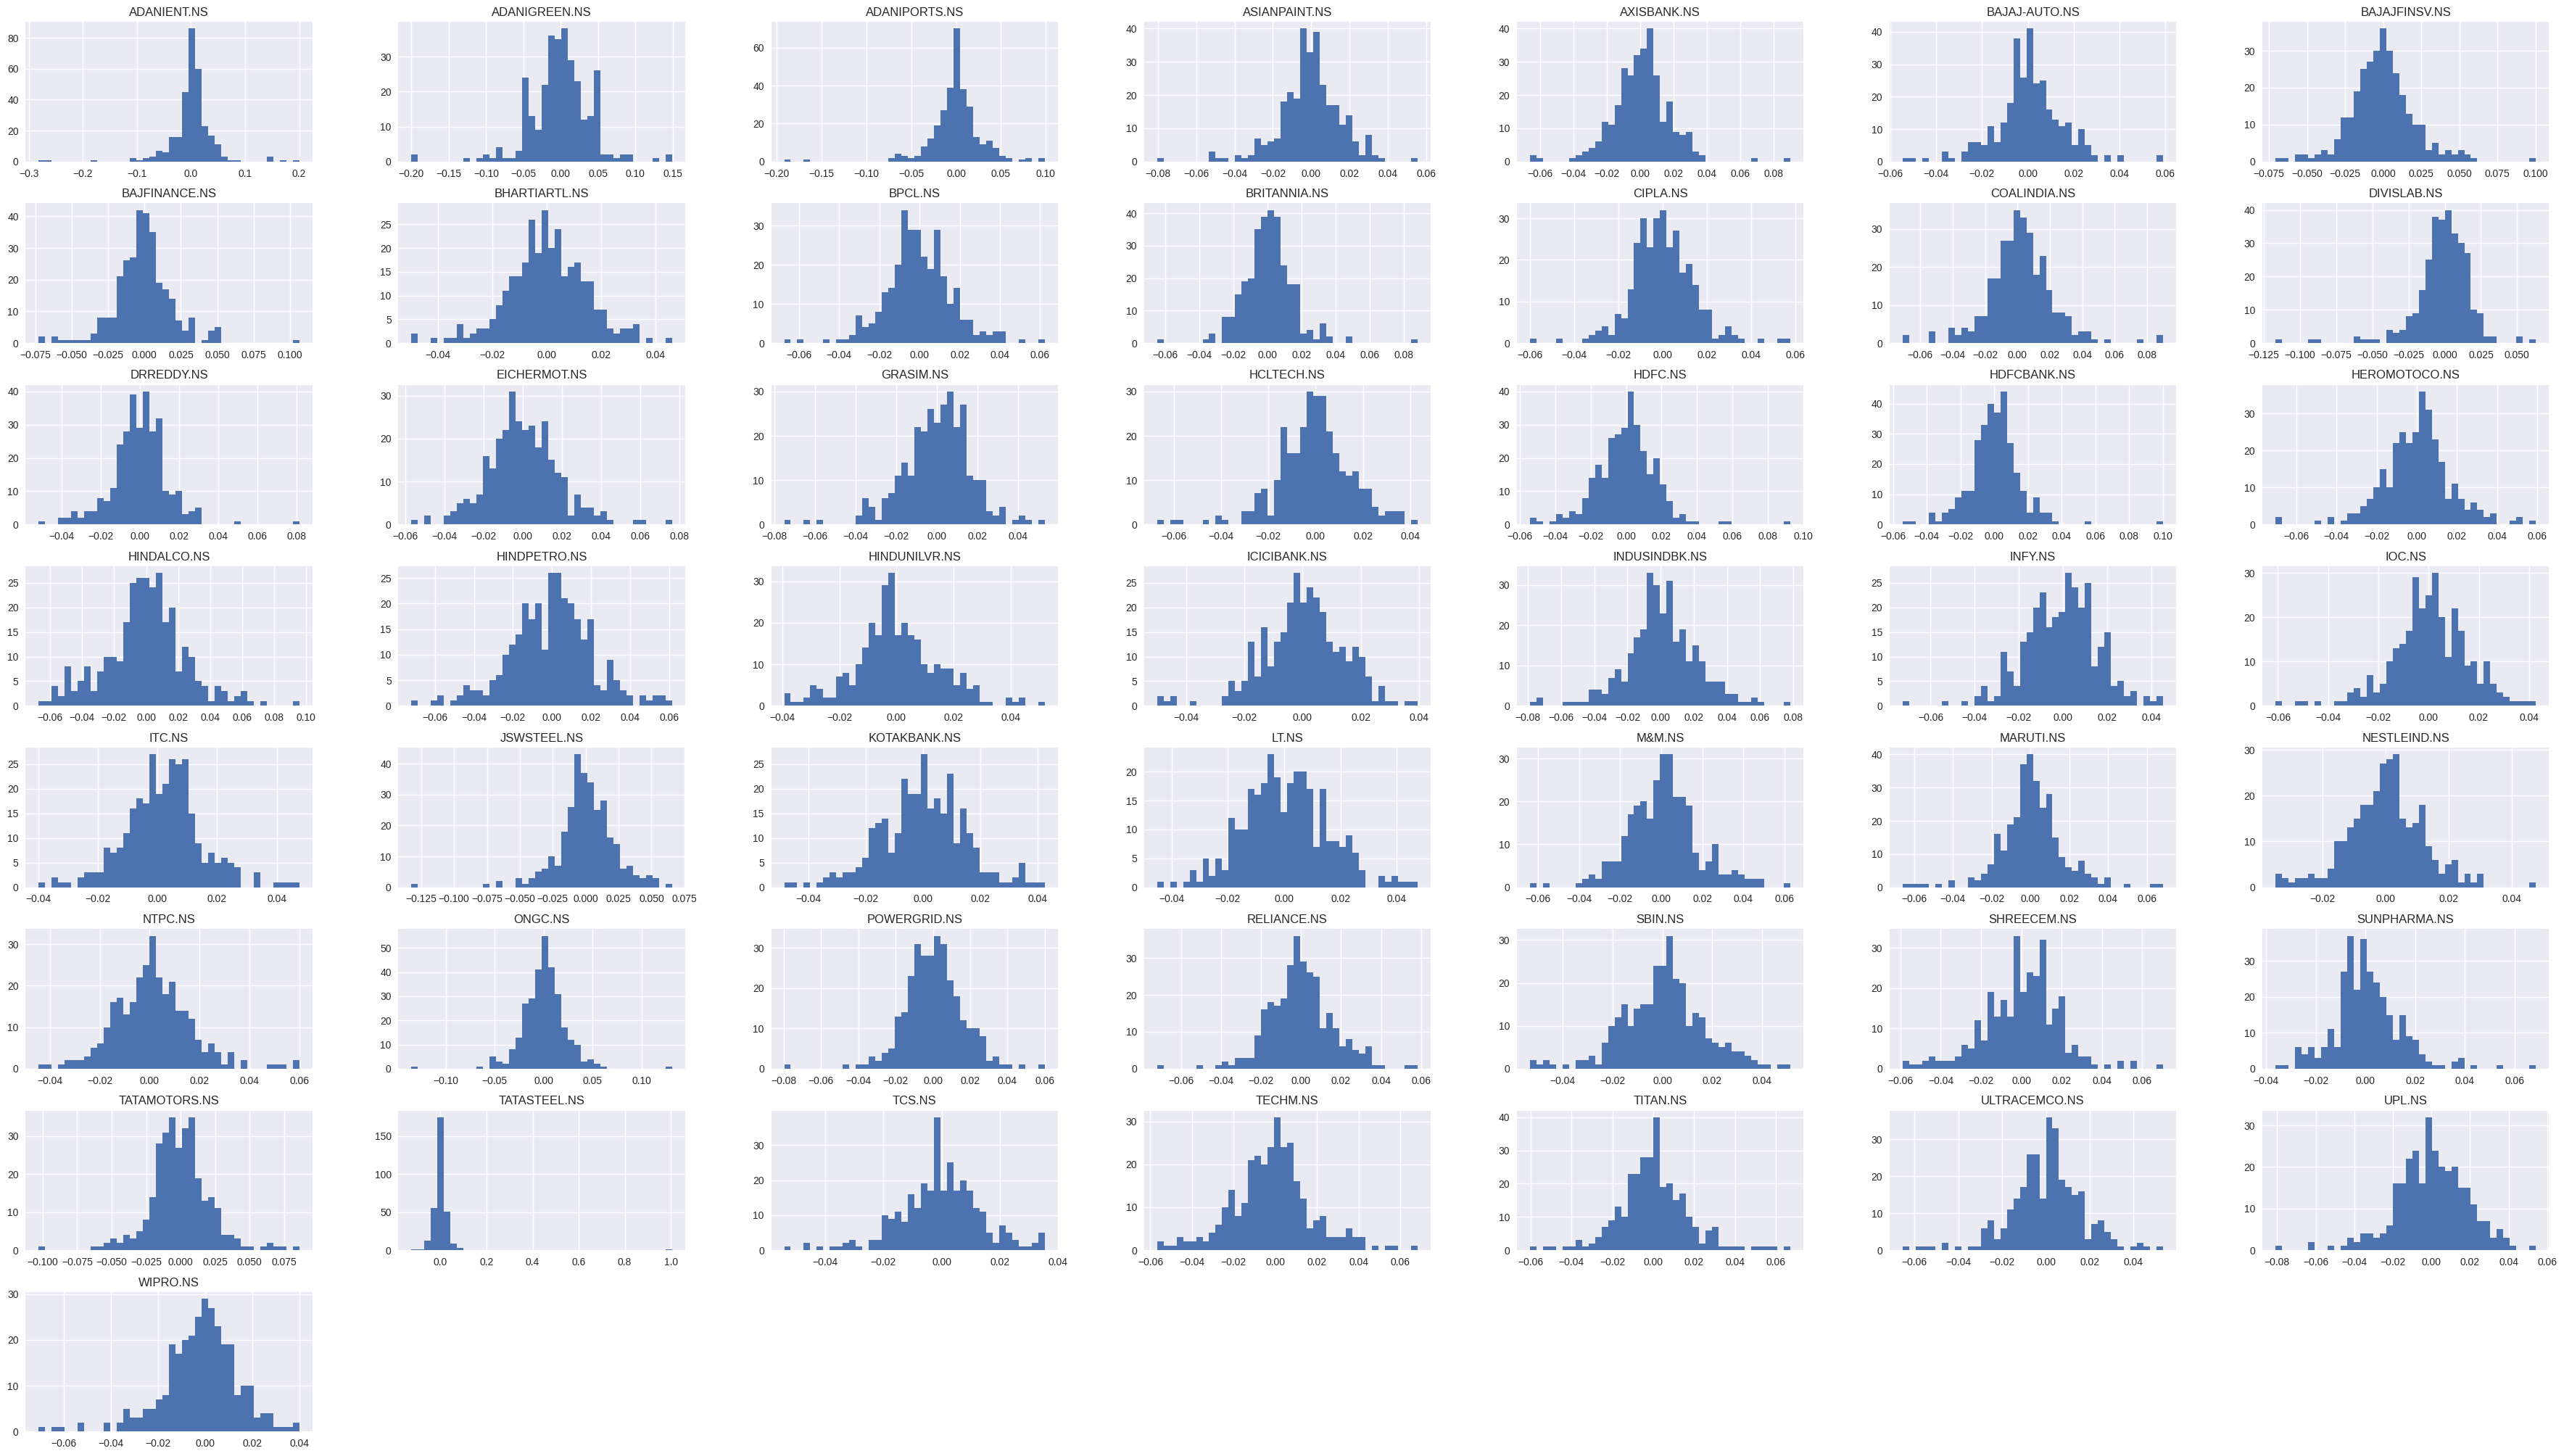

In [ ]:
returns.hist(bins=40, figsize=(40, 24))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Returns')

## **Calculate and plot the correlation matrix**

Text(0.5, 1.0, 'Correlation Matrix of Returns')

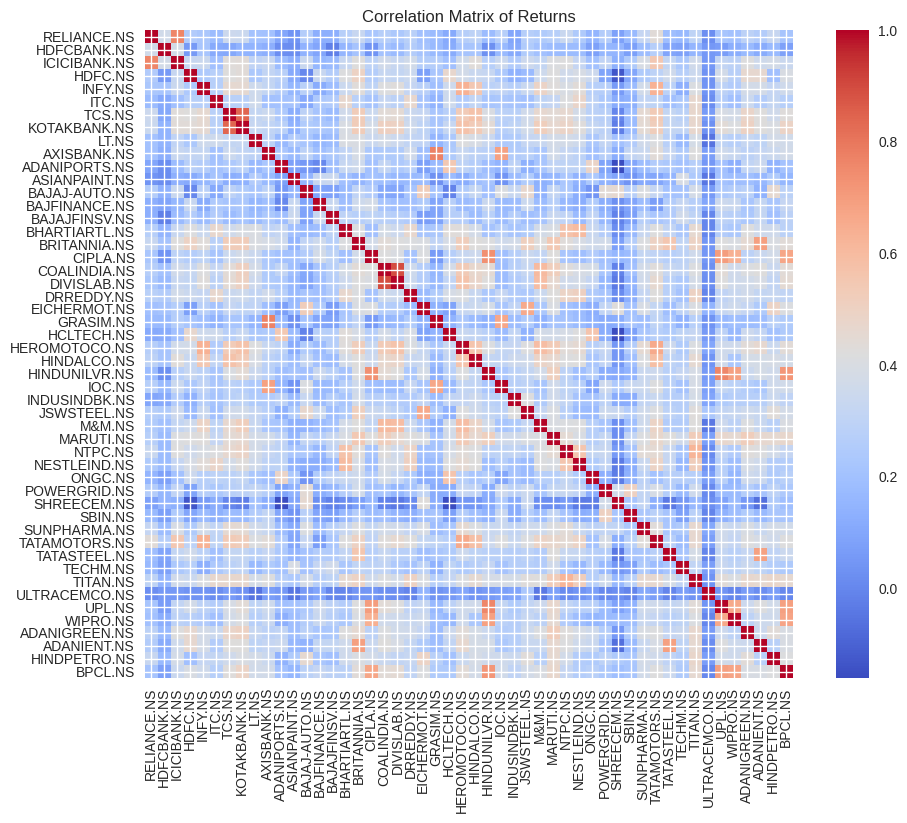

In [ ]:
corr_matrix = returns.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(symbols)), symbols, rotation='vertical')
plt.yticks(range(len(symbols)), symbols)
plt.title('Correlation Matrix of Returns')

# **Model Building**

### **Define the objective function for portfolio optimization (portfolio variance)**

In [ ]:
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

### **Define constraints for the optimization (sum of weights equals 1, non-negative weights)**

In [ ]:
def constraint(weights):
    return np.sum(weights) - 1

def non_negative_constraint(weights):
    return weights

constraints = [{'type': 'eq', 'fun': constraint},
               {'type': 'ineq', 'fun': non_negative_constraint}]

### **Perform portfolio optimization using the mean returns and covariance matrix**

In [ ]:
def optimize_portfolio(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    init_weights = np.ones(num_assets) / num_assets

    opt_result = sco.minimize(
        portfolio_variance,
        init_weights,
        args=(cov_matrix,),
        method='SLSQP',
        constraints=constraints
    )

    return opt_result

### **Obtain the optimal portfolio weights**

In [ ]:
optimal_portfolio = optimize_portfolio(avg_returns, covariance_matrix)

### **Set the risk-free rate**

In [ ]:
risk_free_rate = 0.075

### **Initialize lists to store portfolio metrics**

In [ ]:
port_returns = []
port_volatility = []
port_sharpe_ratio = []
stock_weights = []
num_portfolios =1000

### **Generate random portfolios and calculate their metrics**

In [ ]:
for _ in range(num_portfolios):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)

    returns_portfolio = np.dot(weights, avg_returns)
    volatility_portfolio = np.sqrt(np.dot(weights, np.dot(covariance_matrix, weights.T)))
    sharpe_ratio = (returns_portfolio - risk_free_rate) / volatility_portfolio

    port_returns.append(returns_portfolio)
    port_volatility.append(volatility_portfolio)
    port_sharpe_ratio.append(abs(sharpe_ratio))
    stock_weights.append(weights)

### **Store portfolio metrics in a DataFrame**

In [ ]:
portfolio = {'Returns': port_returns, 'Volatility': port_volatility,'Sharpe Ratio':port_sharpe_ratio,'Weights': stock_weights}
for i, symbol in enumerate(symbols):
    portfolio[symbol] = [weight[i] for weight in stock_weights]

df_portfolio = pd.DataFrame(portfolio)

In [ ]:
df_portfolio

,Returns,Volatility,Sharpe Ratio,Weights,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,HDFC.NS,INFY.NS,ITC.NS,...,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,ADANIGREEN.NS,ADANIENT.NS,HINDPETRO.NS,BPCL.NS
0,0.000204,0.010385,7.201999,"[0.02122342273073009, 0.030290387352105545, 0....",0.021223,0.030290,0.003652,0.009176,0.022652,0.004005,...,0.026781,0.030876,0.031187,0.032843,0.010792,0.034720,0.030581,0.011197,0.000287,0.027929
1,0.000128,0.009774,7.660135,"[0.0041770043069160705, 0.01822035870476851, 0...",0.004177,0.018220,0.005344,0.031294,0.026052,0.021467,...,0.021545,0.022528,0.004155,0.017265,0.029038,0.029600,0.035829,0.029314,0.020257,0.027744
2,0.000305,0.010312,7.243527,"[0.010627979809306017, 0.02727275036988561, 0....",0.010628,0.027273,0.000719,0.006865,0.016147,0.021752,...,0.030749,0.031560,0.034833,0.027039,0.007100,0.011668,0.007297,0.018485,0.020041,0.020227
3,0.000240,0.009912,7.542191,"[0.03208542432652499, 0.038218560205650204, 0....",0.032085,0.038219,0.004169,0.033201,0.024611,0.033764,...,0.032477,0.004021,0.000221,0.030010,0.018460,0.024003,0.015766,0.010812,0.017451,0.022618
4,0.000277,0.010457,7.146045,"[0.03176154689954241, 0.00405198901856302, 0.0...",0.031762,0.004052,0.026000,0.042778,0.026349,0.028475,...,0.025747,0.012475,0.005879,0.027698,0.034457,0.041556,0.037977,0.036752,0.006541,0.001113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000153,0.010465,7.152339,"[0.021497211557117906, 0.011177658082576966, 0...",0.021497,0.011178,0.028061,0.021277,0.000147,0.015933,...,0.036251,0.037119,0.035053,0.030959,0.021944,0.020994,0.026410,0.036706,0.011136,0.029513
996,0.000256,0.010215,7.316767,"[0.0015560838143791607, 0.026540183887329434, ...",0.001556,0.026540,0.019174,0.015107,0.001638,0.030658,...,0.000693,0.035172,0.024910,0.027929,0.019446,0.019122,0.037473,0.014075,0.033662,0.002301
997,0.000213,0.009858,7.586544,"[0.03273107688502586, 0.004211488017359697, 0....",0.032731,0.004211,0.026994,0.021817,0.020161,0.028307,...,0.033841,0.016116,0.017171,0.007478,0.022185,0.020524,0.030398,0.002781,0.005204,0.024168
998,0.000316,0.010029,7.446958,"[0.008367255750504256, 0.025535714595216356, 0...",0.008367,0.025536,0.026365,0.020975,0.032354,0.006983,...,0.003388,0.004908,0.035720,0.034782,0.025857,0.020175,0.000298,0.035585,0.011669,0.027258


### **Filter portfolios with negative Sharpe ratio**

In [ ]:
df_negative_sharpe = df_portfolio[df_portfolio['Sharpe Ratio'] < 0]

### **Plot the efficient frontier**

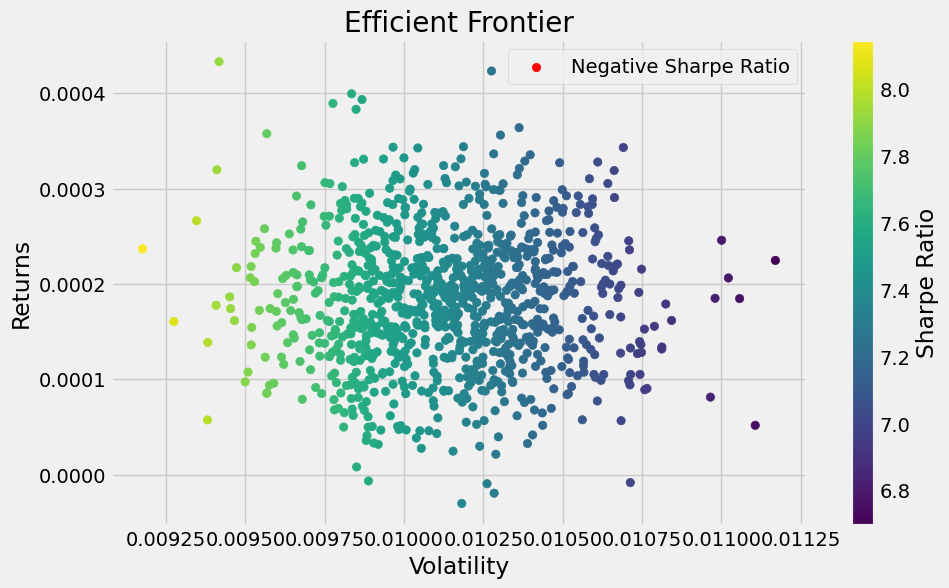

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_portfolio['Volatility'], df_portfolio['Returns'], c=df_portfolio['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(df_negative_sharpe['Volatility'], df_negative_sharpe['Returns'], color='red', label='Negative Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

### **Plot the efficient frontier with Max Sharpe Ratio and Min Volatility portfolios highlighted**

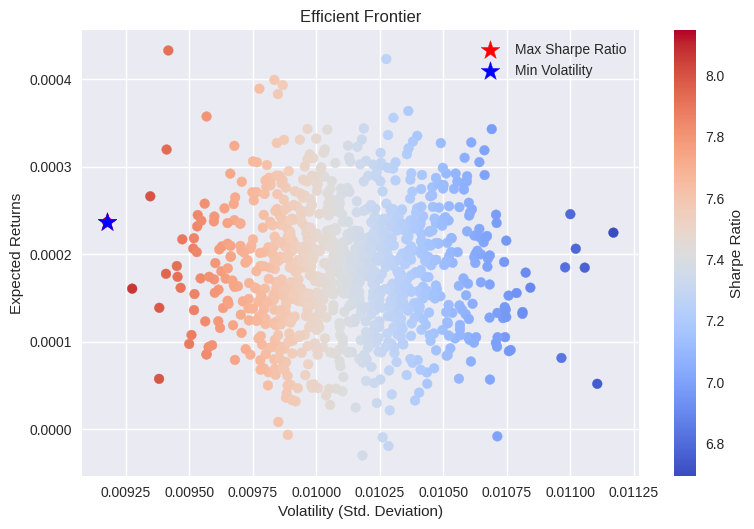

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(df_portfolio['Volatility'], df_portfolio['Returns'], c=df_portfolio['Sharpe Ratio'], cmap='coolwarm')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
max_sharpe_Ratio= df_portfolio['Sharpe Ratio'].idxmax()
plt.scatter(df_portfolio.loc[max_sharpe_Ratio, 'Volatility'], df_portfolio.loc[max_sharpe_Ratio, 'Returns'], color='red', marker='*', s=200, label='Max Sharpe Ratio')
min_volatility= df_portfolio['Volatility'].idxmin()
plt.scatter(df_portfolio.loc[min_volatility, 'Volatility'], df_portfolio.loc[min_volatility, 'Returns'], color='blue', marker='*', s=200, label='Min Volatility')
plt.legend()
plt.show()

### **Calculate the average weights for selected stocks**

In [ ]:
selected_stocks = df_portfolio.columns[0:]
selected_weights = df_portfolio[selected_stocks].mean()

### **Print the selected stocks and their weights**

In [ ]:
for stock, weight in zip(selected_stocks, selected_weights):
    print(f"Stock: {stock}, Weight: {weight}")

Stock: Returns, Weight: 0.00018294165258297097
Stock: Volatility, Weight: 0.010135121456118619
Stock: Sharpe Ratio, Weight: 7.388272223790897
Stock: Weights, Weight: 0.019919670515478792
Stock: RELIANCE.NS, Weight: 0.020054327416265522
Stock: HDFCBANK.NS, Weight: 0.019616894331007526
Stock: ICICIBANK.NS, Weight: 0.019415393944261432
Stock: HDFC.NS, Weight: 0.020482488060935732
Stock: INFY.NS, Weight: 0.019679223406089845
Stock: ITC.NS, Weight: 0.02021147315950772
Stock: TCS.NS, Weight: 0.0196637512168509
Stock: KOTAKBANK.NS, Weight: 0.020031915705630468
Stock: LT.NS, Weight: 0.019421262341059602
Stock: AXISBANK.NS, Weight: 0.02007222575456917
Stock: ADANIPORTS.NS, Weight: 0.019523437727830738
Stock: ASIANPAINT.NS, Weight: 0.020017456053197807
Stock: BAJAJ-AUTO.NS, Weight: 0.020387684167132557
Stock: BAJFINANCE.NS, Weight: 0.020156482001524787
Stock: BAJAJFINSV.NS, Weight: 0.019860820829398027
Stock: BHARTIARTL.NS, Weight: 0.020628369538249074
Stock: BRITANNIA.NS, Weight: 0.020333844367

### **Find the portfolio with maximum return**

In [ ]:
max_return= df_portfolio['Returns'].idxmax()
max_return_portfolio = df_portfolio.loc[max_return]

print("Portfolio with Maximum Return:")
print(max_return_portfolio)

Portfolio with Maximum Return:
Returns                                                   0.000433
Volatility                                                0.009417
Sharpe Ratio                                              7.918447
Weights          [0.010069177888100928, 0.005478025199524924, 0...
RELIANCE.NS                                               0.010069
HDFCBANK.NS                                               0.005478
ICICIBANK.NS                                              0.006336
HDFC.NS                                                   0.009613
INFY.NS                                                   0.000335
ITC.NS                                                    0.028209
TCS.NS                                                    0.006408
KOTAKBANK.NS                                              0.020138
LT.NS                                                     0.036505
AXISBANK.NS                                               0.009491
ADANIPORTS.NS                  

### **Find the portfolio with minimum volatility**

In [ ]:
min_volatility_idx = df_portfolio['Volatility'].idxmin()
min_volatility_portfolio = df_portfolio.loc[min_volatility_idx]

print("Portfolio with Minimum Volatility:")
print(min_volatility_portfolio)

Portfolio with Minimum Volatility:
Returns                                                   0.000237
Volatility                                                0.009176
Sharpe Ratio                                              8.147542
Weights          [0.015801223687438942, 0.00512724155525749, 0....
RELIANCE.NS                                               0.015801
HDFCBANK.NS                                               0.005127
ICICIBANK.NS                                              0.004576
HDFC.NS                                                   0.032427
INFY.NS                                                   0.010175
ITC.NS                                                    0.032363
TCS.NS                                                    0.011132
KOTAKBANK.NS                                              0.004739
LT.NS                                                     0.020772
AXISBANK.NS                                               0.021751
ADANIPORTS.NS              

### **Find the portfolio with maximum Sharpe ratio**

In [ ]:
max_sharpe= df_portfolio['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = df_portfolio.loc[max_sharpe]

print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

Portfolio with Maximum Sharpe Ratio:
Returns                                                   0.000237
Volatility                                                0.009176
Sharpe Ratio                                              8.147542
Weights          [0.015801223687438942, 0.00512724155525749, 0....
RELIANCE.NS                                               0.015801
HDFCBANK.NS                                               0.005127
ICICIBANK.NS                                              0.004576
HDFC.NS                                                   0.032427
INFY.NS                                                   0.010175
ITC.NS                                                    0.032363
TCS.NS                                                    0.011132
KOTAKBANK.NS                                              0.004739
LT.NS                                                     0.020772
AXISBANK.NS                                               0.021751
ADANIPORTS.NS            

### **Calculate Value at Risk (VaR) and Conditional Value at Risk (CVaR)**

In [ ]:
confidence_level = 0.05
returns_sorted = df_portfolio['Returns'].sort_values(ascending=True)
var= np.percentile(returns_sorted, confidence_level * 100)
var

6.945587297326656e-05

In [ ]:
cvar= returns_sorted[returns_sorted <= var].mean()

In [ ]:
cvar

4.277068045821498e-05

In [ ]:
print("Maximum Return Portfolio:")
print(max_return_portfolio[['Returns', 'Volatility']])

print("\nMinimum Volatility Portfolio:")
print(min_volatility_portfolio[['Returns', 'Volatility']])

print(f"\n5% Value at Risk (VaR): {var:.2%}")
print(f"Conditional Value at Risk (CVaR): {cvar:.2%}")

Maximum Return Portfolio:
Returns       0.000433
Volatility    0.009417
Name: 668, dtype: object

Minimum Volatility Portfolio:
Returns       0.000237
Volatility    0.009176
Name: 138, dtype: object

5% Value at Risk (VaR): 0.01%
Conditional Value at Risk (CVaR): 0.00%


### **Perform clustering of portfolios using K-means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_portfolio[['Returns', 'Volatility']])
df_portfolio['Cluster'] = kmeans.labels_

### **Plot the clustering results using parallel coordinates**

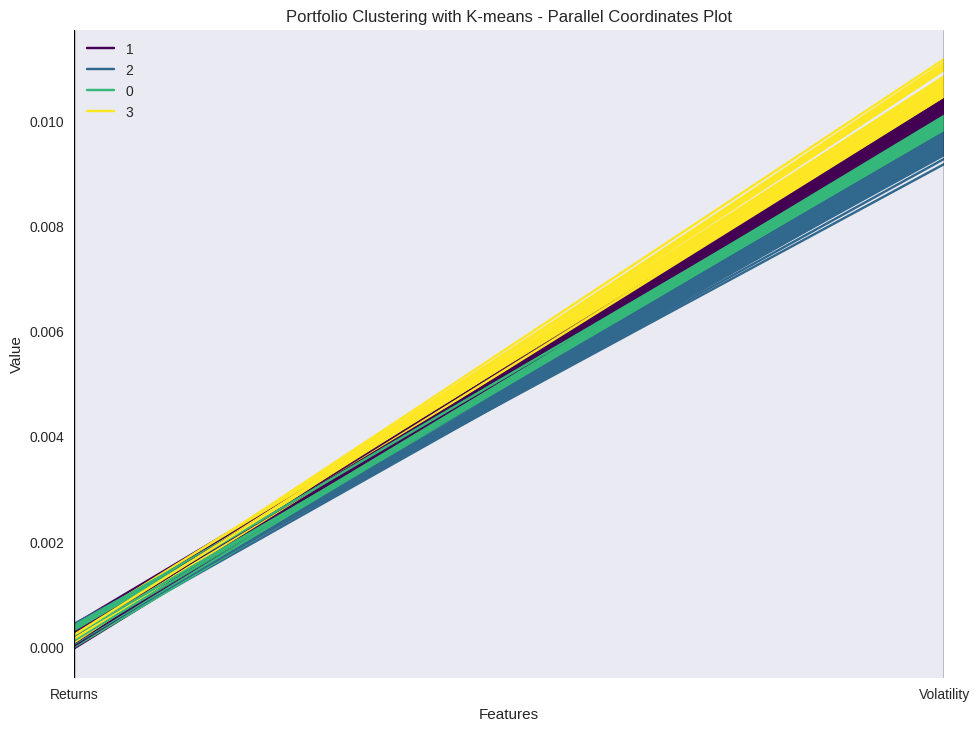

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10, 8))
parallel_coordinates(df_portfolio[['Returns', 'Volatility', 'Cluster']], 'Cluster', colormap='viridis')
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Portfolio Clustering with K-means - Parallel Coordinates Plot')
plt.legend()
plt.show()

### **Plot the returns of each cluster using box plots**

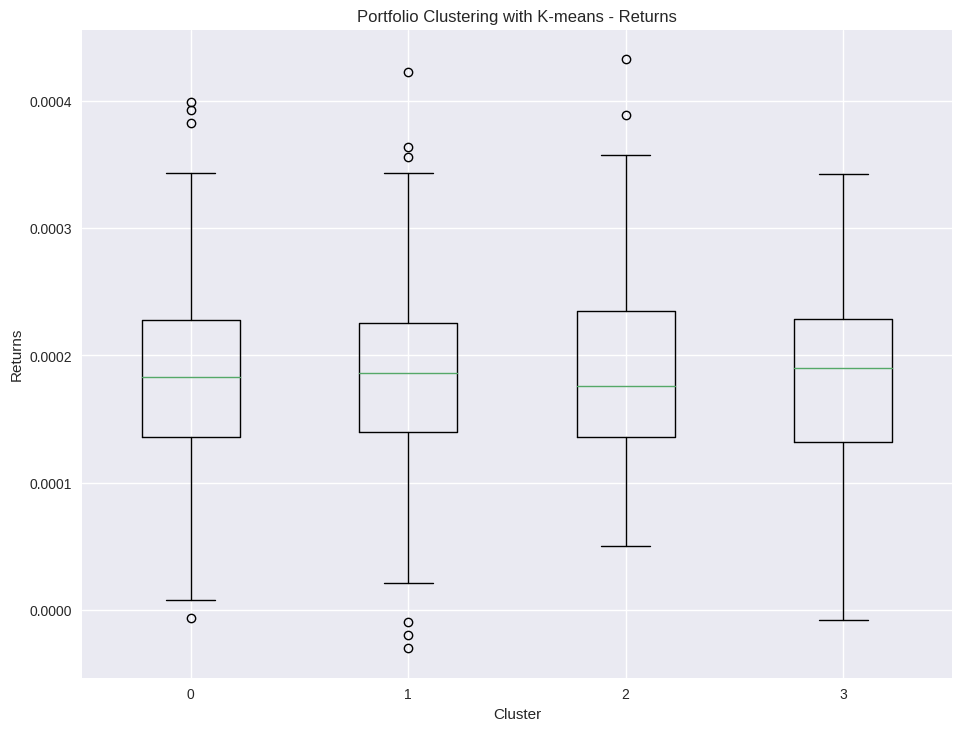

In [ ]:
plt.figure(figsize=(10, 8))
plt.boxplot([df_portfolio[df_portfolio['Cluster'] == i]['Returns'] for i in range(4)], labels=range(4))
plt.xlabel('Cluster')
plt.ylabel('Returns')
plt.title('Portfolio Clustering with K-means - Returns')
plt.show()

### **Perform visualization of portfolios using PCA**

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_portfolio[['Returns', 'Volatility']])
df_portfolio['PC1'] = pca_data[:, 0]
df_portfolio['PC2'] = pca_data[:, 1]

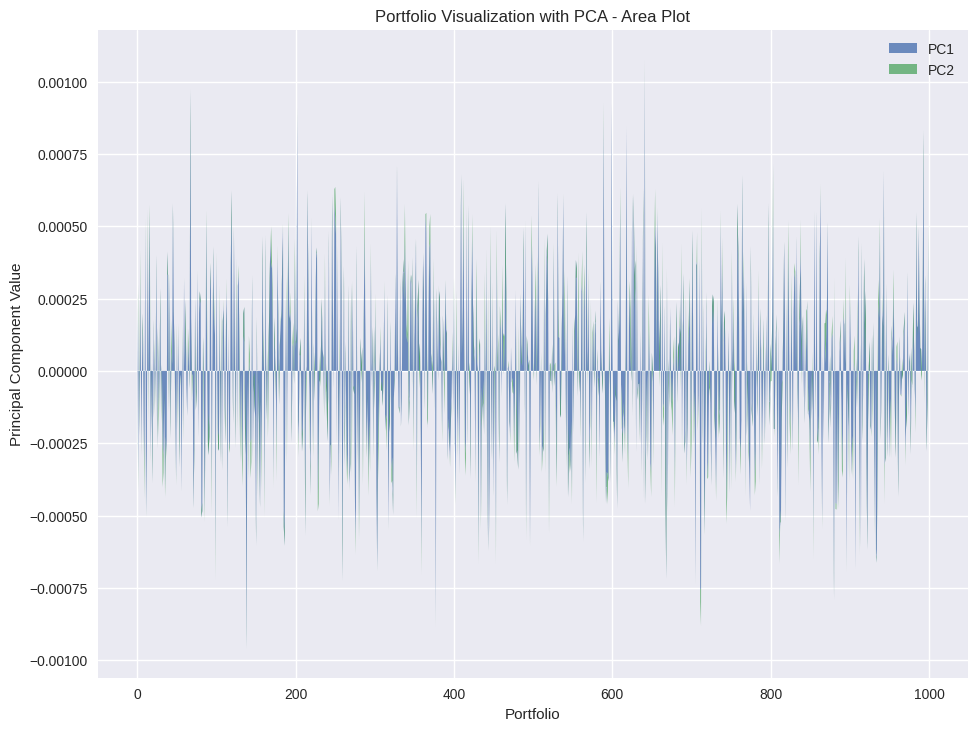

In [ ]:
plt.figure(figsize=(10, 8))
plt.stackplot(range(len(df_portfolio)), df_portfolio['PC1'], df_portfolio['PC2'], labels=['PC1', 'PC2'], alpha=0.8)
plt.xlabel('Portfolio')
plt.ylabel('Principal Component Value')
plt.title('Portfolio Visualization with PCA - Area Plot')
plt.legend()
plt.show()